In [69]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from PIL import Image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
import matplotlib.pyplot as plt

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import os
os.chdir('/content/drive/MyDrive/images')

In [50]:
images = os.listdir()
print(images)

['aegislash-blade.png', 'absol.png', 'aerodactyl.png', 'aggron.png', 'alakazam.png', 'abomasnow.png', 'abra.png', 'accelgor.png', 'aipom.png', 'articuno.png', 'amoonguss.png', 'arceus.png', 'ampharos.png', 'arcanine.png', 'aron.png', 'archen.png', 'audino.png', 'altaria.png', 'alomomola.png', 'ambipom.png', 'arbok.png', 'anorith.png', 'amaura.png', 'aromatisse.png', 'ariados.png', 'araquanid.png', 'armaldo.png', 'archeops.png', 'bayleef.png', 'beldum.png', 'basculin-red-striped.png', 'baltoy.png', 'beautifly.png', 'aurorus.png', 'barbaracle.png', 'bellossom.png', 'azumarill.png', 'bastiodon.png', 'beheeyem.png', 'beartic.png', 'bellsprout.png', 'avalugg.png', 'bergmite.png', 'azelf.png', 'banette.png', 'beedrill.png', 'axew.png', 'azurill.png', 'barboach.png', 'bagon.png', 'bidoof.png', 'bronzong.png', 'blastoise.png', 'breloom.png', 'blissey.png', 'bronzor.png', 'braviary.png', 'budew.png', 'bonsly.png', 'blaziken.png', 'boldore.png', 'binacle.png', 'bruxish.png', 'braixen.png', 'boun

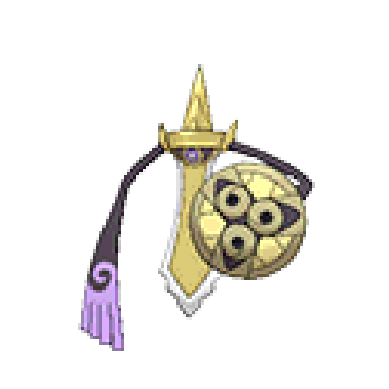

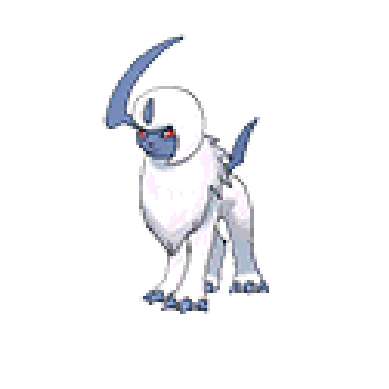

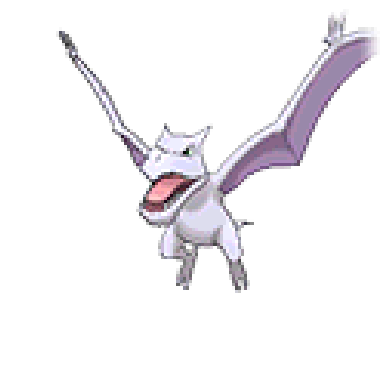

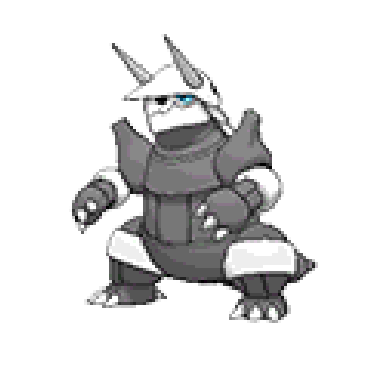

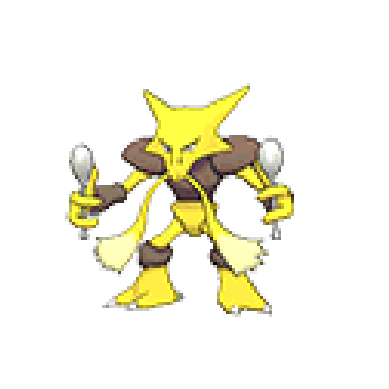

In [51]:
from PIL import Image
import matplotlib.pyplot as plt
for image_path in images[0:5]:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [52]:
def process_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    return img_array

In [53]:
image_size = (224, 224)
image_dir = '/content/drive/MyDrive/images'

In [54]:
label_file_path = '/content/pokemon.csv'
labels_df = pd.read_csv(label_file_path)
labels_df.head()

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard


In [55]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# labels_df['Type2'].fillna('None', inplace=True)
# labels_df['Evolution'].fillna('None', inplace=True)
encoded_labels = encoder.fit_transform(labels_df[['Type1']])
encoded_labels_df = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(['Type1']))
encoded_labels_df.insert(0, 'Name', labels_df['Name'])
encoded_labels_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Name,Type1_Bug,Type1_Dark,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Flying,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Steel,Type1_Water
0,bulbasaur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ivysaur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,venusaur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,charmander,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,charmeleon,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
type1_columns = [col for col in encoded_labels_df.columns if col.startswith('Type1_')]
type1_labels = encoded_labels_df[type1_columns]
type1_labels.head()

,Type1_Bug,Type1_Dark,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Flying,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Steel,Type1_Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
labels_df = pd.read_csv('/content/pokemon.csv')
print(labels_df.head())

         Name  Type1   Type2   Evolution
0   bulbasaur  Grass  Poison     ivysaur
1     ivysaur  Grass  Poison    venusaur
2    venusaur  Grass  Poison         NaN
3  charmander   Fire     NaN  charmeleon
4  charmeleon   Fire     NaN   charizard


In [58]:
csv_file = '/content/pokemon.csv'
df = pd.read_csv(csv_file)
image_dir = '/content/drive/MyDrive/images'
img_size = (128, 128)
name_to_type1 = dict(zip(df['Name'].str.lower(), df['Type1']))
images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        name = os.path.splitext(filename)[0].lower()

        if name in name_to_type1:

            img_path = os.path.join(image_dir, filename)
            image = Image.open(img_path).resize(img_size)
            image = img_to_array(image) / 255.0
            images.append(image)
            labels.append(name_to_type1[name])

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images.")
print("First 5 labels:", labels[:5])

Loaded 809 images.
First 5 labels: ['Steel' 'Dark' 'Rock' 'Steel' 'Psychic']


In [59]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

In [60]:
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, Validation labels shape: {y_val.shape}")

Training set shape: (647, 128, 128, 4), Training labels shape: (647, 18)
Validation set shape: (162, 128, 128, 4), Validation labels shape: (162, 18)


In [65]:
model = Sequential([
    Conv2D(32, (3, 3), activation='tanh', input_shape=(128, 128, 4)),
    MaxPooling2D(pool_size=(2, 2)),
    # BatchNormalization(),

    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    # BatchNormalization(),

    Conv2D(128, (3, 3), activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    # BatchNormalization(),

    Flatten(),
    # Dense(128, activation='relu'),
    # Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(18, activation='softmax')
])

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 32)        │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 18)                  │           1,170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,101,208 (19.46 MB)

 Trainable params: 1,700,402 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,400,806 (12.97 MB)

In [67]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.0918 - loss: 3.0093 - val_accuracy: 0.1358 - val_loss: 2.7556
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1517 - loss: 2.7298 - val_accuracy: 0.1790 - val_loss: 2.6539
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1638 - loss: 2.6925 - val_accuracy: 0.2407 - val_loss: 2.5423
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2062 - loss: 2.4719 - val_accuracy: 0.2037 - val_loss: 2.5722
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2684 - loss: 2.3588 - val_accuracy: 0.2469 - val_loss: 2.5399
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2918 - loss: 2.2062 - val_accuracy: 0.1975 - val_loss: 2.5376
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3447 - loss: 2.0094 - val_accuracy: 0.1975 - val_loss: 2.6018
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4448 - loss: 1.7236 - val_accuracy: 0.1975 - val_loss:

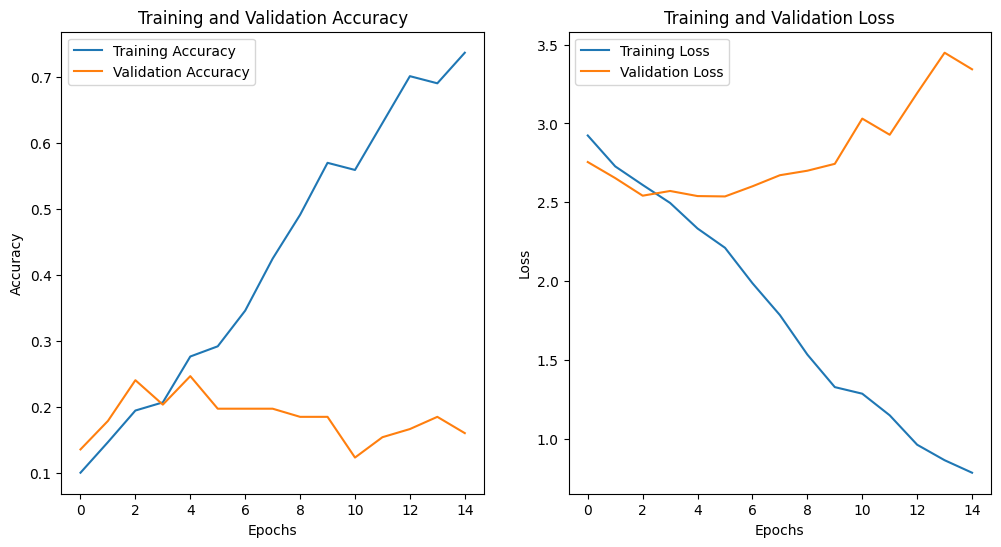

In [70]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
model.save('my_model.keras')